**Тема: Video Game Sales (Продажи видеоигр)**


Этот набор данных содержит список видеоигр с продажами более 100 000 копий.

In [175]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 150
data = pd.read_csv('vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Обработка данных**

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


*  Rank - Рейтинг общих продаж
*  Name - Название игры
*  Platform - Платформа, на которую был выпущена игра (=PC,PS4, и.т.д.)
*  Year - Год выпуска игры
*  Genre - Жанр игры
*  Publisher - Издатель игры
*  NA_Sales - Продажи в Северной Америке (в миллионах)
*  EU_Sales - Продажи в Европе (в миллионах)
*  JP_Sales - Продажи в Японии (в миллионах)
*  Other_Sales - Продажи в остальном мире (в миллионах)
*  Global_Sales - Общий объем продаж по всему миру.

Мы видим, что в названияъ столбцов пробелы уже заменены на "_". Оставим всё как есть

In [141]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

У нас пропуски значений по столбцам "Year" и "Publisher". Заменяем пропуски в графе "Year" на "0", так как мы не знаем дату выхода игры, а в "Publisher"  на "None", так как не знаем разработчика. Тем самым мы избавляемся от нулевых значений

In [177]:
data['Year'] = data['Year'].fillna(0)
data['Publisher'] = data['Publisher'].fillna('None')
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Проверяем наличие дубликатов

In [35]:
data.duplicated().sum()

0

Нам повезло, дубликаов нет. Можем приступать к работе с данными

**Гипотеза 1:** Основные продажи игр приходятся на долю рынка Северной Америке

Сравним показатели Продаж в Северной америке с показателями в Европе, Японии и остальных странах

In [36]:
data["NA_Sales"].mean() > data["EU_Sales"].mean() 
data["NA_Sales"].mean() > data["JP_Sales"].mean() 
data["NA_Sales"].mean() > data["Other_Sales"].mean()

True

Вычислим, какоё процент от общих продаж приходится на рынок Северной америки

In [37]:
data["NA_Sales"].sum() * 100 / data["Global_Sales"].sum()

49.245889216227006

Мы видим, что продажи на рынке Северной Америки не превышают продажи в Европе, Японии и остальных странах. Вычислив процент продаж в Северной Америке от общего количества продаж во всём мире мы видим, что процент продаж в Северной Америке превышает 49%. В сумме эти оба фактора говорят нам о том, что выдвинутая гипотеза верна

**Гипотеза 2:** Больше всего игр выходит на рынок в жанре "Action"

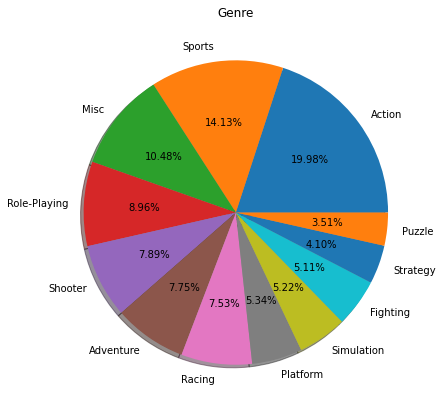

In [38]:
d = data.Genre.value_counts().reset_index()
plt.figure(figsize=(7,7))
plt.pie(d.Genre, labels = d['index'],autopct='%0.2f%%',shadow=True)
plt.title("Genre")
plt.show()

Как мы видим на диаграмме процент игр в жанре Actyon больше всего, значит гипотеза верна

**Групировка по жанрам и вывод количества**

In [180]:
data.groupby('Genre')['Name'].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Name, dtype: int64

Получаем процентное содержание в виде таблицы

In [182]:
data.groupby('Genre').size() / len(data) * 100

Genre
Action          19.978311
Adventure        7.747921
Fighting         5.109049
Misc            10.477166
Platform         5.337993
Puzzle           3.506447
Racing           7.525003
Role-Playing     8.964936
Shooter          7.892517
Simulation       5.223521
Sports          14.134233
Strategy         4.102904
dtype: float64

Сортировка значений по Убыванию

In [189]:
df = data.groupby('Genre').size().to_frame('total') / len(data) * 100
df = df.sort_values(['total'], ascending=[False])
df

,total
Genre,
Action,19.978311
Sports,14.134233
Misc,10.477166
Role-Playing,8.964936
Shooter,7.892517
Adventure,7.747921
Racing,7.525003
Platform,5.337993
Simulation,5.223521


Построим диаграмму на основе полученых данных 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


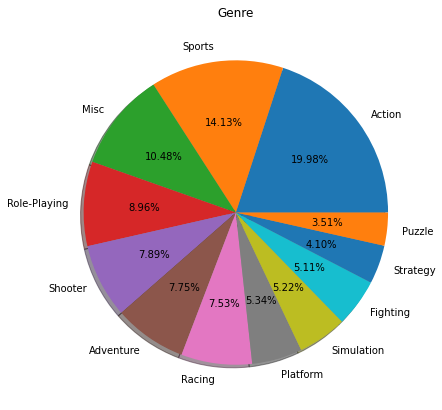

In [190]:
d = data.Genre.value_counts().reset_index()
plt.figure(figsize=(7,7))
plt.pie(df, labels = d['index'],autopct='%0.2f%%',shadow=True)
plt.title("Genre")
plt.show()